In [50]:
# 导入库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import warnings
warnings.filterwarnings('ignore')

pokemon = pd.read_csv("Pokemon.csv")

In [ ]:
1. 检查是否满足完整性，并填充空值，结果发现type2出现了百分之四十八左右的缺失值。

In [69]:
# to check if complete, fill in null
pokemon.replace('null',pd.NA,inplace=True)
percent_missing = pokemon.isnull().sum() * (100/len(pokemon))
missing_value = pd.DataFrame({
    'percent_missing':percent_missing
})
missing_value.sort_values(by='percent_missing',ascending=False)
print(missing_value)
pokemon['Type 2'].fillna('null',inplace=True)

            percent_missing
#                      0.00
Name                   0.00
Type 1                 0.00
Type 2                48.25
Total                  0.00
HP                     0.00
Attack                 0.00
Defense                0.00
Sp. Atk                0.00
Sp. Def                0.00
Speed                  0.00
Generation             0.00
Legendary              0.00


In [ ]:
2. 检查是否满足一致性（检测异常值）

In [ ]:
(1). 统计pokemon各属性，发现不同小精灵之间综合实力差距较大，标准差达120左右。可能有些小精灵比较脆吧。。。

In [15]:
pokemon.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [ ]:
(2). 绘制pokemon各属性的箱形图，发现在HP、Attack、Defense、sp.Atk、sp.Def、Speed等属性处出现了适度离群值，在HP处出现了极端离群值。

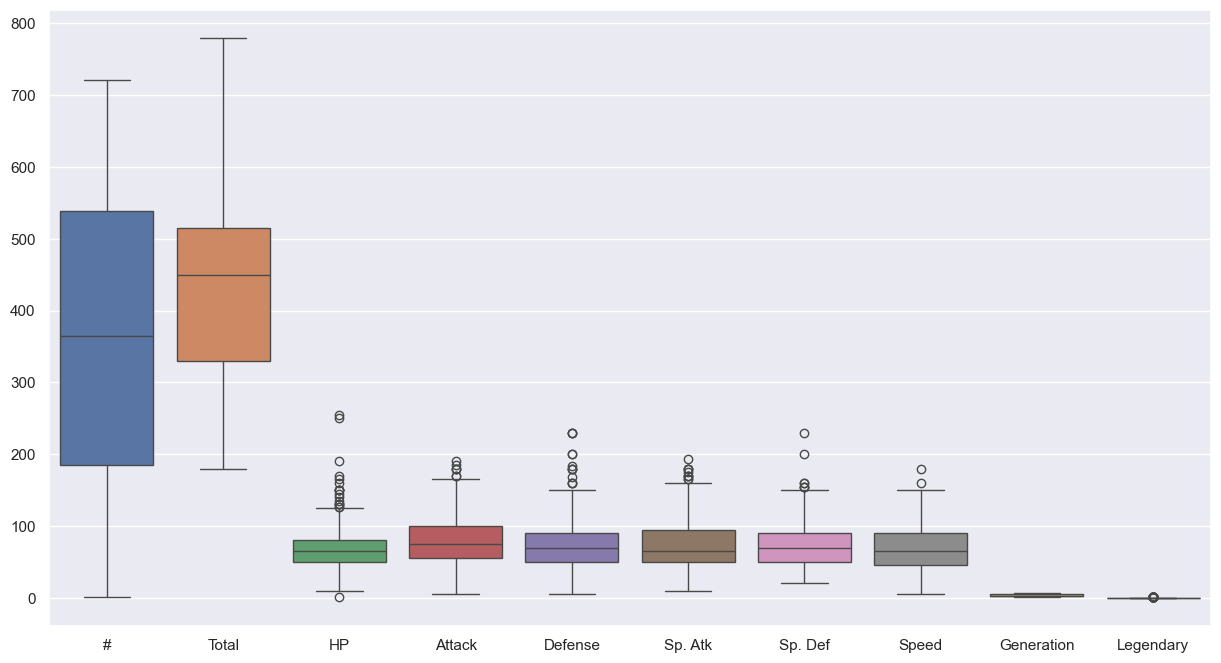

In [52]:
plt.figure(figsize=(15,8))
sns.boxplot(data=pokemon)
plt.show()

In [ ]:
(3). 统计Legendary的占比，发现不足10%。查阅相关资料后发现神兽“被宝可梦世界奉为神灵般存在，占8.16%左右”，确实十分稀有。

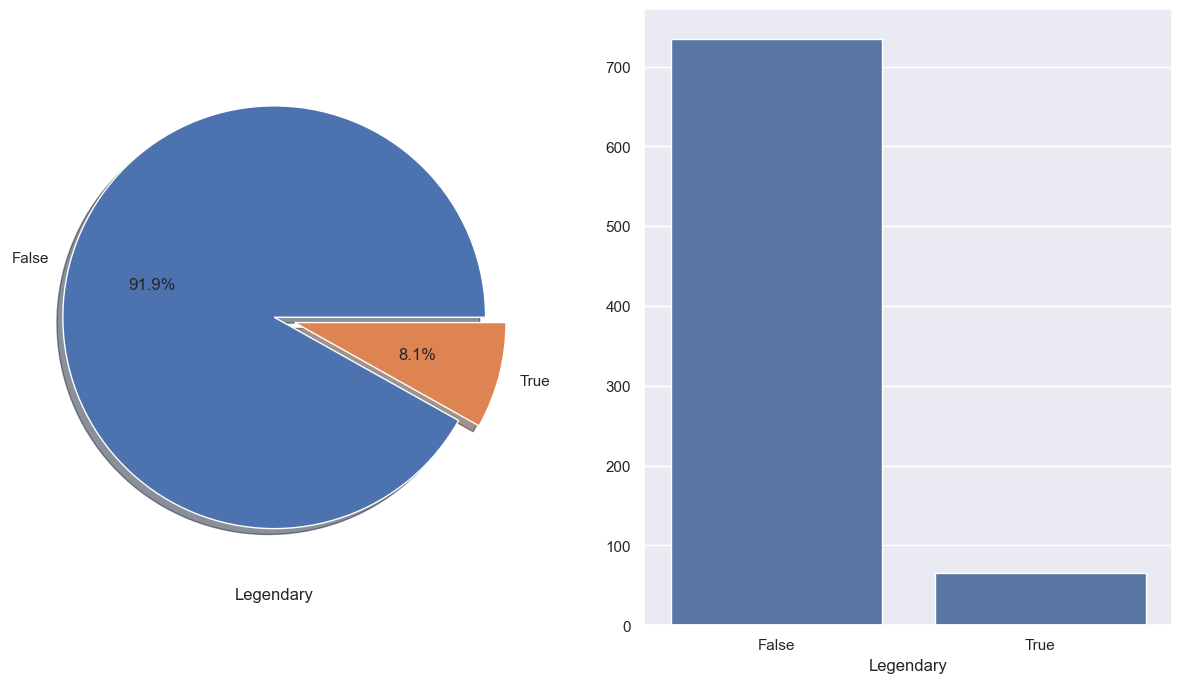

In [11]:
f,ax = plt.subplots(1,2,figsize=(15,8))
pokemon['Legendary'].value_counts().plot.pie(ax=ax[0],shadow=True,explode=[0,0.1],autopct='%1.1f%%')
ax[0].set_ylabel('')
ax[0].set_xlabel('Legendary')
sns.countplot(x='Legendary',data=pokemon,ax=ax[1])
ax[1].set_ylabel('')
ax[1].set_xlabel('Legendary')
plt.show()

In [ ]:
(4). 统计不同属性pokemon的Legendary占比，发现Legendary在属性一间的分布极不平衡。属性一为Flying的神兽数高达50%，为Dragon和Psychic的神兽数也不少，分别为38%和25%左右。而神兽数最少的小精灵，如Fighting和Poison，占比几乎为0。

<Axes: xlabel='Type 1', ylabel='count'>

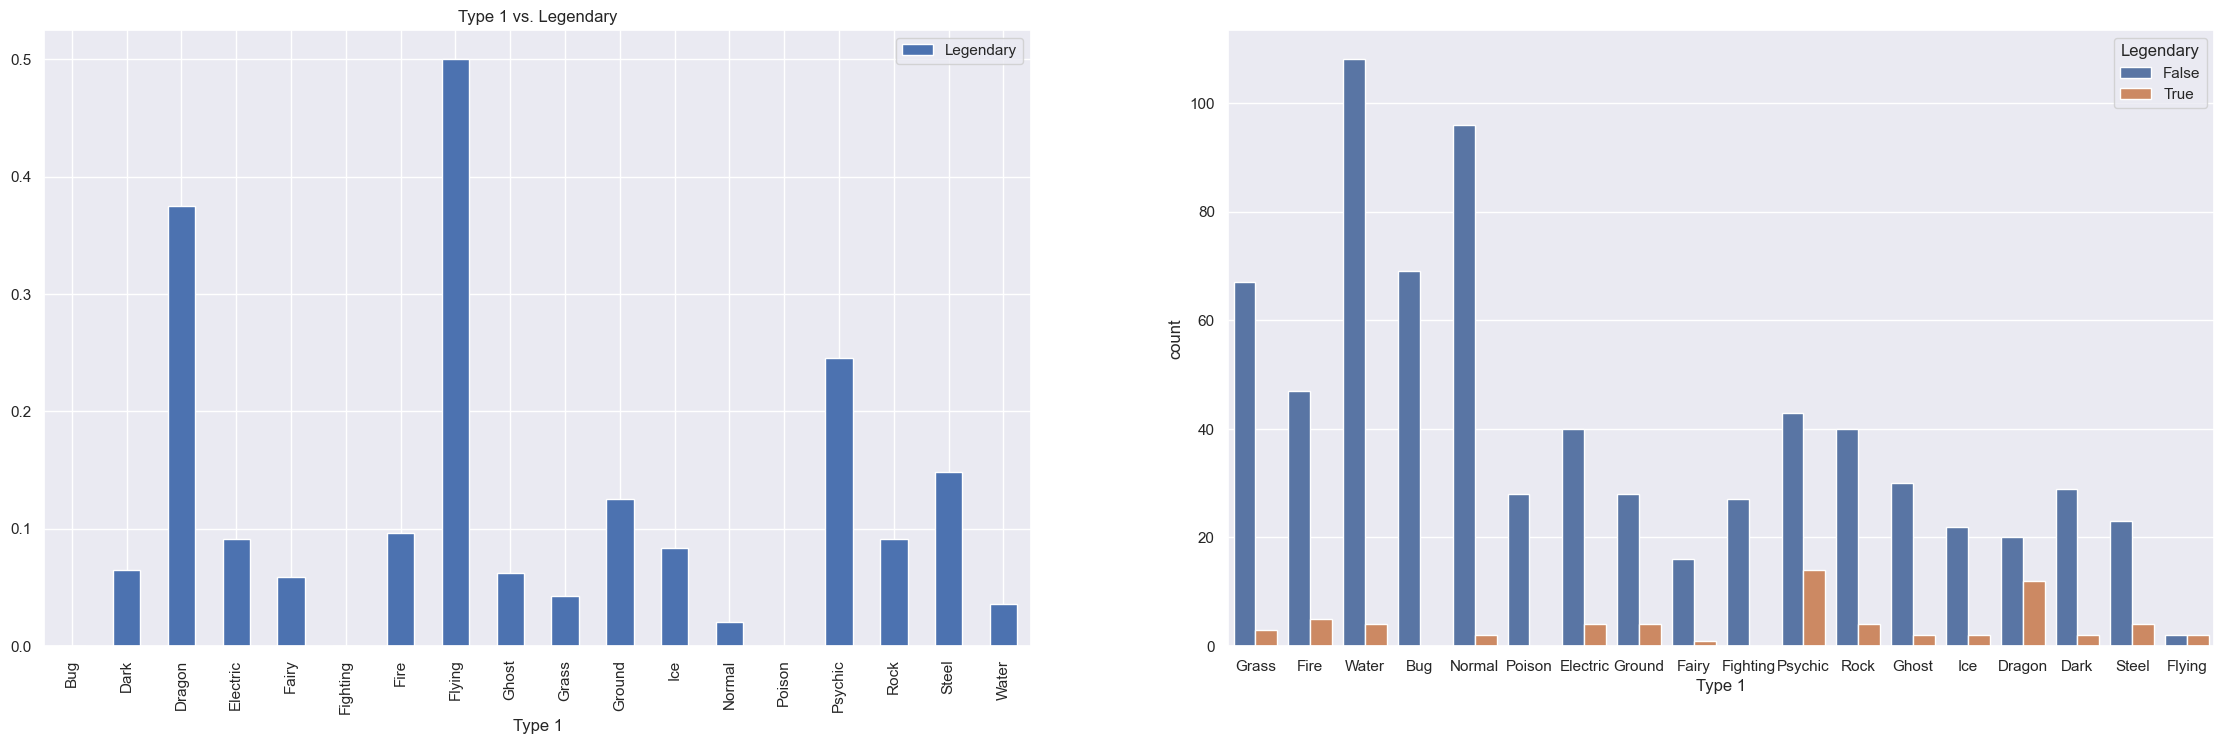

In [34]:
f,ax = plt.subplots(1,2,figsize=(28,8))
pokemon[['Type 1','Legendary']].groupby('Type 1').mean().plot.bar(ax=ax[0])
ax[0].set_title("Type 1 vs. Legendary")
sns.countplot(x='Type 1', hue='Legendary', data=pokemon, ax=ax[1])

<Axes: xlabel='Type 2', ylabel='count'>

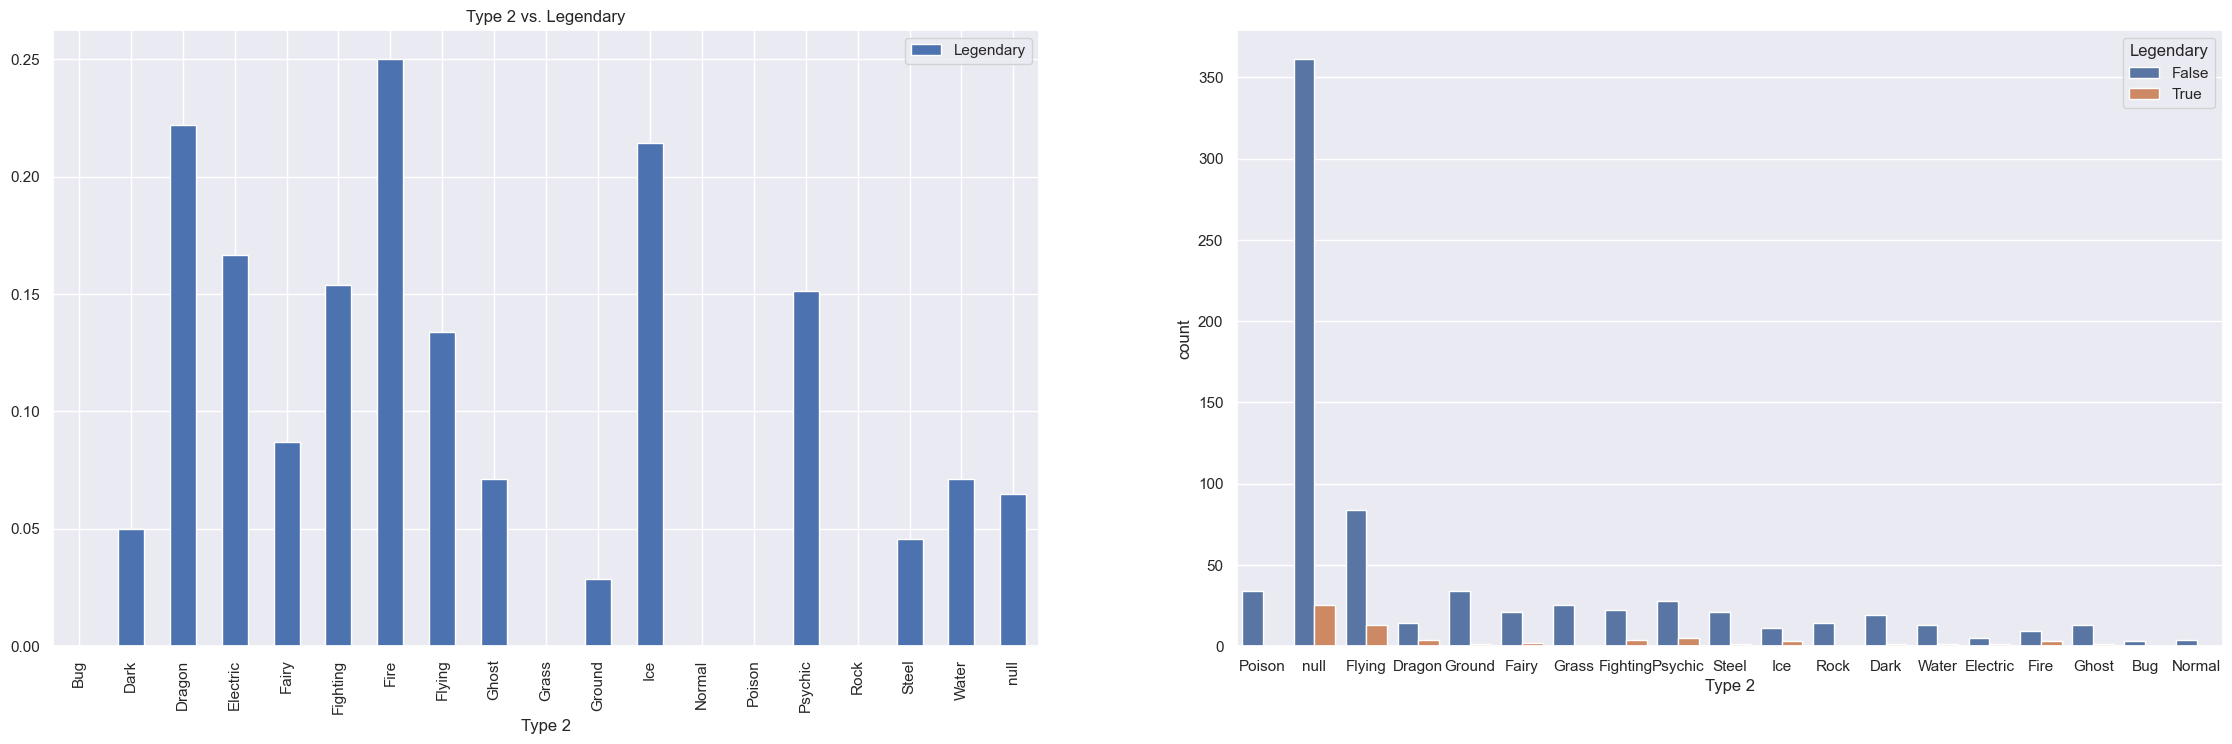

In [36]:
f,ax = plt.subplots(1,2,figsize=(28,8))
pokemon[['Type 2','Legendary']].groupby('Type 2').mean().plot.bar(ax=ax[0])
ax[0].set_title("Type 2 vs. Legendary")
sns.countplot(x='Type 2', hue='Legendary', data=pokemon, ax=ax[1])

In [ ]:
(5). 统计Generation和Legendary之间的交叉频数，发现每一世代都有神兽出现，分布还挺合理的。其中第三世代pokemon中出现神兽的比例最高。但是查阅资料后发现宝可梦已经出到第八世代了，这可能说明该数据集的Currency不是很好。

In [71]:
pd.crosstab(pokemon.Generation, pokemon.Legendary, margins=True).style.background_gradient(cmap='Blues')

Legendary,False,True,All
Generation,,,
1,160,6,166
2,101,5,106
3,142,18,160
4,108,13,121
5,150,15,165
6,74,8,82
All,735,65,800


In [74]:
print("1st generation: ",round(6/160,2))
print("2nd generation: ",round(5/101,2))
print("3rd generation: ",round(18/142,2))
print("4th generation: ",round(13/108,2))
print("5th generation: ",round(15/150,2))

1st generation:  0.04
2nd generation:  0.05
3rd generation:  0.13
4th generation:  0.12
5th generation:  0.1


Text(0.5, 1.0, 'Legendary vs. Generation')

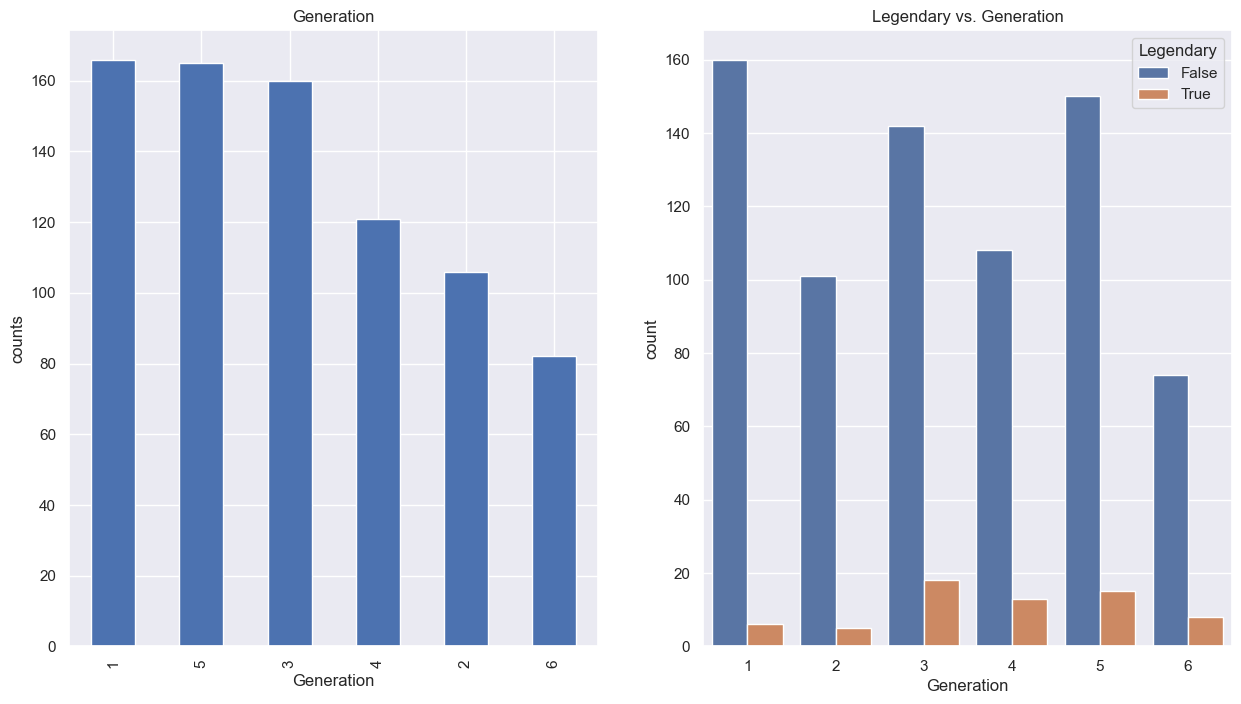

In [44]:
f,ax=plt.subplots(1,2,figsize=(15,8))
pokemon['Generation'].value_counts().plot.bar(ax=ax[0])
ax[0].set_ylabel('counts')
ax[0].set_title('Generation')
sns.countplot(x='Generation', hue='Legendary', data=pokemon, ax=ax[1])
ax[1].set_title('Legendary vs. Generation')

In [ ]:
(6). 统计pokemon中Legendary与notLegendary两类神奇宝贝的HP分布，绘制出其核密度估计图，发现两者的分布形态相似，神兽HP普遍比非神兽高出40左右，这点较为合理。但是非神兽HP分布的离散程度较高，可能存在一些错误数据点。

not Legendary HP: 60
Legendary HP: 100


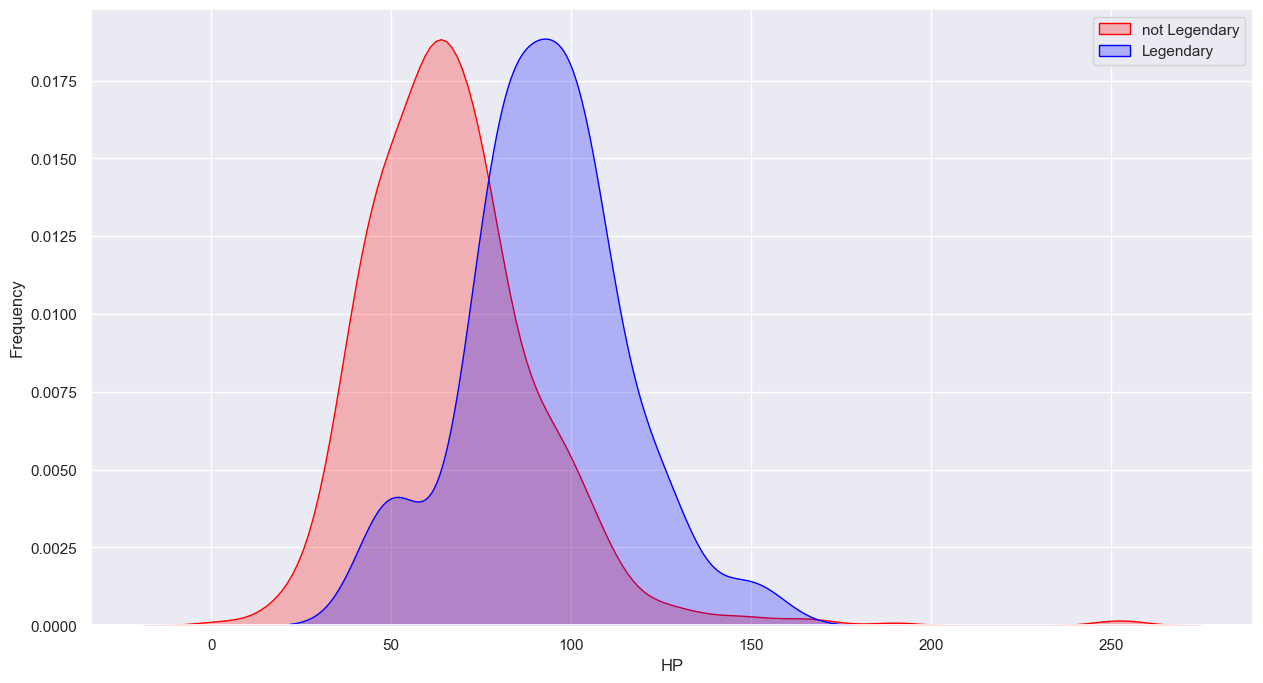

In [48]:
plt.figure(figsize=(15,8))
g = sns.kdeplot(pokemon['HP'][pokemon['Legendary']==0],color="Red",shade=True)
g = sns.kdeplot(pokemon['HP'][pokemon['Legendary']==1],ax=g,color="Blue",shade=True)
g.set_xlabel("HP")
g.set_ylabel("Frequency")
g = g.legend(["not Legendary","Legendary"])
print('not Legendary HP:',pokemon["HP"][pokemon["Legendary"]==0].value_counts().index[0])
print('Legendary HP:',pokemon["HP"][pokemon["Legendary"]==1].value_counts().index[0])

In [ ]:
'''
1. 完整性（Completeness）：
数据集中存在缺失值，特别是"type2"属性中缺失值的比例达到了约48%左右。

2. 同一性（Coherence）：
没有发现重复列，应该不存在问题。

3. 精确性（Correctness）：
(1). Legendary占比不足10%，但这与相关资料中神兽占比约8.16%的说法相符合，不存在问题。
(2). 不同属性的Pokemon中，Legendary的分布极不平衡，一些属性（如Flying、Dragon和Psychic）中的神兽数量较多，而其他属性（如Fighting和Poison）几乎没有神兽数量。

4. 及时性（Currency）：
数据集的"Generation"字段未包括最新的第八世代，可能说明数据集的及时性不够。

5. 一致性（Consistency）：
(1). 综合实力差距较大：不同小精灵之间的综合实力差距较大，标准差达到约120左右。这可能表明某些小精灵的实力较弱，容易被击败。
(2). 离群值：在多个属性（如HP、Attack、Defense、sp.Atk、sp.Def、Speed）上出现了适度和极端的离群值，这些离群值可能是数据录入错误，也可能是特殊情况。
(3). 通过核密度估计图可以观察到，Legendary和非Legendary神奇宝贝的HP分布形态相似，但非Legendary的HP分布离散程度较高，可能存在一些错误数据点。
综上所述，Pokemon数据集可能存在完整性、精确性、及时性和一致性方面的问题。
对于可能出错的数据点，应该注意，由于属性设置不同，可能会出现特别强大或特殊的小精灵，这种个例需要具体情况具体分析。
'''